<a href="https://colab.research.google.com/github/stancanrold/Predicting-loan-default/blob/master/problem_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules and Data

In [ ]:
import pandas as pd
import numpy as np

import math

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Loading the data
from google.colab import files
uploaded = files.upload()

Saving credit_card_default.csv to credit_card_default (1).csv


In [ ]:
credit_card_default = pd.read_csv("credit_card_default.csv")
credit_card_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30000 non-null  int64  
 1   ID          30000 non-null  int64  
 2   LIMIT_BAL   30000 non-null  int64  
 3   SEX         30000 non-null  int64  
 4   EDUCATION   30000 non-null  int64  
 5   MARRIAGE    30000 non-null  int64  
 6   AGE         30000 non-null  int64  
 7   PAY_0       30000 non-null  int64  
 8   PAY_2       30000 non-null  int64  
 9   PAY_3       30000 non-null  int64  
 10  PAY_4       30000 non-null  int64  
 11  PAY_5       30000 non-null  int64  
 12  PAY_6       30000 non-null  int64  
 13  BILL_AMT1   30000 non-null  int64  
 14  BILL_AMT2   30000 non-null  int64  
 15  BILL_AMT3   30000 non-null  int64  
 16  BILL_AMT4   30000 non-null  int64  
 17  BILL_AMT5   30000 non-null  int64  
 18  BILL_AMT6   30000 non-null  int64  
 19  PAY_AMT1    30000 non-nul

In [ ]:
# rename dataset
raw_data = credit_card_default


In [ ]:
#update column name for 'PAY_0' to 'PAY_1'

raw_data.rename(columns= {
    'PAY_0':'PAY_1',  
},   inplace=True) 
raw_data.head()


,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.287578,1,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.788305,0,0,1,3
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.408977,1,0,0,1
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.883017,0,0,1,3
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.940467,0,0,1,3


In [ ]:
## Explore & Transform - LIMIT_BAL
##data description:** integer - individual consumer credit & supplementary credit in NT Dollar

In [ ]:
raw_data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
%pip install woeBinningPandas



In [ ]:
import numpy as np

import math

import warnings
import woeBinningPandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



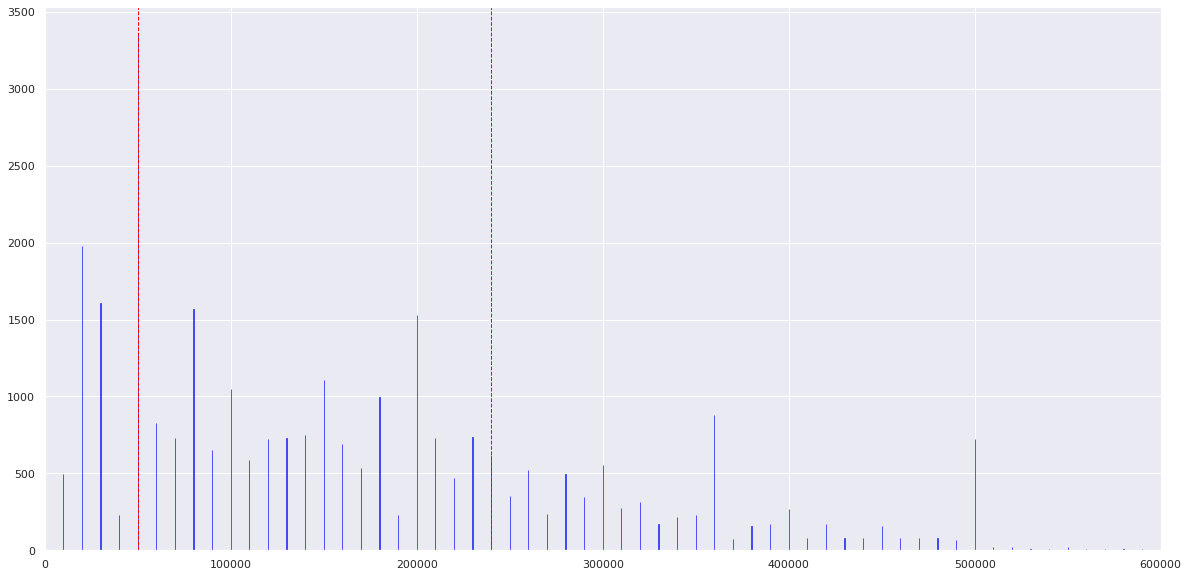

In [ ]:
plt.hist(raw_data["LIMIT_BAL"], bins=10000, color='c', edgecolor='blue', alpha=0.65)
plt.xlim(0,600000)
plt.axvline(50000, color='red', linestyle='dashed', linewidth=1)
plt.axvline(240000, color='red', linestyle='dashed', linewidth=1)


In [ ]:
limit_bal_bin = raw_data.iloc[ : , [2,25]]
limit_bal_bin.head()

,LIMIT_BAL,DEFAULT
0,20000,1
1,120000,1
2,90000,0
3,50000,0
4,50000,0


In [ ]:
limit_bal_bin=woeBinningPandas.woe_binning(raw_data,"DEFAULT","LIMIT_BAL", 0.05, 0, 0.1, 50, 'DEFAULT')

# bins results
limit_bal_bin

#availabe bins
limit_bal_bin["cutpoints_final"]


predictor_var_binned
(-inf, 30000.0]            -inf
(30000.0, 160000.0]     30000.0
(160000.0, inf]        160000.0
Missing                     inf
Name: cutpoints_final, dtype: float64

In [ ]:
#recommended transformation - LIMIT_BAL** Dummy variables if LIMIT_BAL is below 30k or above 60k   
#Leave out >30k & < 160k as cross correlation would render this variable irrelevant.
#recoding function
def my_recode1(series):
    if series <=30000:
        return 1
    else:
        return 0

def my_recode2(series):
    if series > 160000:
        return 1
    else:
        return 0

raw_data["LIMIT_BAL_below_30k"] = raw_data["LIMIT_BAL"].apply(my_recode1)
raw_data["LIMIT_BAL_above_160k"] = raw_data["LIMIT_BAL"].apply(my_recode2)

raw_data[["LIMIT_BAL_below_30k","LIMIT_BAL_above_160k" ]].describe()

,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k
count,30000.000000,30000.000000
mean,0.136033,0.430200
std,0.342830,0.495112
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
##Binning for regression analysis - in case of tree analysis, continuous variable recommended.**   
   
## Explore & Transform - Demographics: 
##data descriptions:**   
##**SEX** Categorical: (1) = Male; (2) = Female   
##**EDUCATION** Categorical: (1) = graduate school; (2) = university; (3) = high school; (4) = others   
##**MARRIAGE** Categorical: (1) = married; (2) = single; (3) = others   

raw_data[["SEX", "EDUCATION","MARRIAGE" ]].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Text(0, 0.5, 'Observations Count')

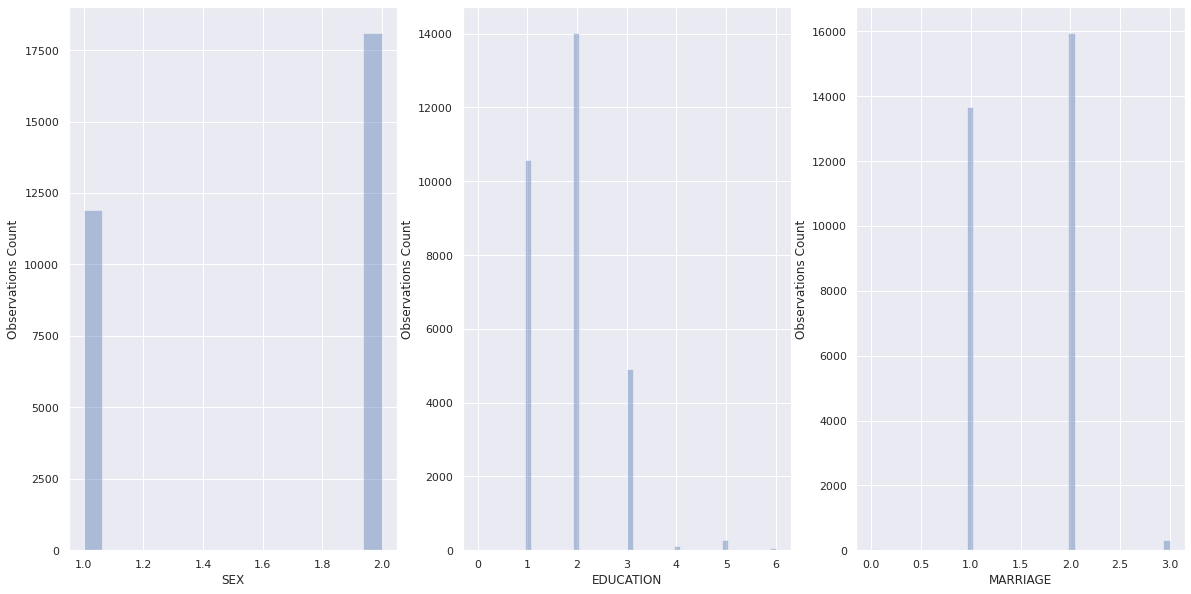

In [ ]:
#Histogram: SEX, EDUCATION, MARRIAGE**

# Getting social predictors only 
dem_raw_data = raw_data[["SEX", "EDUCATION","MARRIAGE" ]]
dem_raw_data.columns
sns.set(rc={'figure.figsize':(20,10)})

fig, axs = plt.subplots(ncols=3)
sns.distplot(raw_data['SEX'],kde=False, ax=axs[0])
axs[0].set_ylabel("Observations Count")
sns.distplot(raw_data['EDUCATION'], kde=False, ax=axs[1])
axs[1].set_ylabel("Observations Count")
sns.distplot(raw_data['MARRIAGE'],kde=False, ax=axs[2])
axs[2].set_ylabel("Observations Count")


In [ ]:
#observations & recommendations for transformation:** 
   
#SEX** predominately female, suggestion to change categories to (0) = male; (1) = female 
def my_recode3(series):
  if series == 2:
    return  1
  else :
    return 0

raw_data["SEX_FEMALE"] = raw_data["SEX"].apply(my_recode3)



In [ ]:
#MARRIAGE** 'other' values (0) & (3) outliers - change categories to (1) = Married; (0) = Not Married
def my_recode4(series):
  if series == 1:
    return  1
  else :
    return 0

raw_data["Married_Y"] = raw_data["MARRIAGE"].apply(my_recode4)
raw_data["MARRIAGE"].describe()
  

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [ ]:
##EDUCATION - Categorical frequency**

s = raw_data["EDUCATION"].value_counts()
s

def my_recode5(series):
  d= series * 100

  return f"{round(d, 1)} %"

ed_table = pd.DataFrame(s).reset_index()
ed_table.columns = ['EDUCATION', 'FREQUENCY']
ed_table["PCT"] = ed_table["FREQUENCY"]/30000
ed_table["PCT"] = ed_table["PCT"].apply(my_recode5)
ed_table


,EDUCATION,FREQUENCY,PCT
0,2,14030,46.8 %
1,1,10585,35.3 %
2,3,4917,16.4 %
3,5,280,0.9 %
4,4,123,0.4 %
5,6,51,0.2 %
6,0,14,0.0 %


In [ ]:
ed_df3= raw_data.iloc[:, [4,25]]

def my_recode6(series):
  if series > 3:
    return 0
  else:
    return series



ed_df3["EDUCATION"] = ed_df3["EDUCATION"].apply(my_recode6)


s = ed_df3["EDUCATION"].value_counts()
ed_table2 = pd.DataFrame(s).reset_index()
ed_table2.columns =["EDUCATION", "FREQUENCY"]

ed_table2["PCT"] = ed_table2["FREQUENCY"]/30000
ed_table2["PCT"] = ed_table2["PCT"].apply(my_recode5)
ed_table2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,EDUCATION,FREQUENCY,PCT
0,2,14030,46.8 %
1,1,10585,35.3 %
2,3,4917,16.4 %
3,0,468,1.6 %


In [ ]:
%pip install scorecardpy



In [ ]:

import scorecardpy as sc

bins = sc.woebin(ed_df3, y="DEFAULT", x="EDUCATION")
bins


[INFO] creating woe binning ...


{'EDUCATION':     variable         bin  count  ...  total_iv  breaks  is_special_values
 0  EDUCATION  [-inf,2.0)  11053  ...  0.024129     2.0              False
 1  EDUCATION   [2.0,3.0)  14030  ...  0.024129     3.0              False
 2  EDUCATION   [3.0,inf)   4917  ...  0.024129     inf              False
 
 [3 rows x 12 columns]}

In [ ]:
#EDUCATION - recommended transformation** Reduce variable to two classes:
#ED_Grad_Other** = (0) = high school/university; (1\) = Graduate/Other

def my_recode7(series):
  if (series < 1) | (series > 3 ) | (series == 1):
    return 1
  else:
    return 0

raw_data["ED_Grad_other"] = raw_data["EDUCATION"].apply(my_recode7)


s = raw_data["ED_Grad_other"].value_counts()
ed_table3 = pd.DataFrame(s).reset_index()
ed_table3.columns =["EDUCATION", "FREQUENCY"]

ed_table3["PCT"] = ed_table3["FREQUENCY"]/9572
ed_table3["PCT"] = ed_table3["PCT"].apply(my_recode5)
ed_table3



,EDUCATION,FREQUENCY,PCT
0,0,18947,197.9 %
1,1,11053,115.5 %


In [ ]:


## Explore & Transform - AGE

#AGE - data description:** integer - age of customer in years

raw_data["AGE"].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

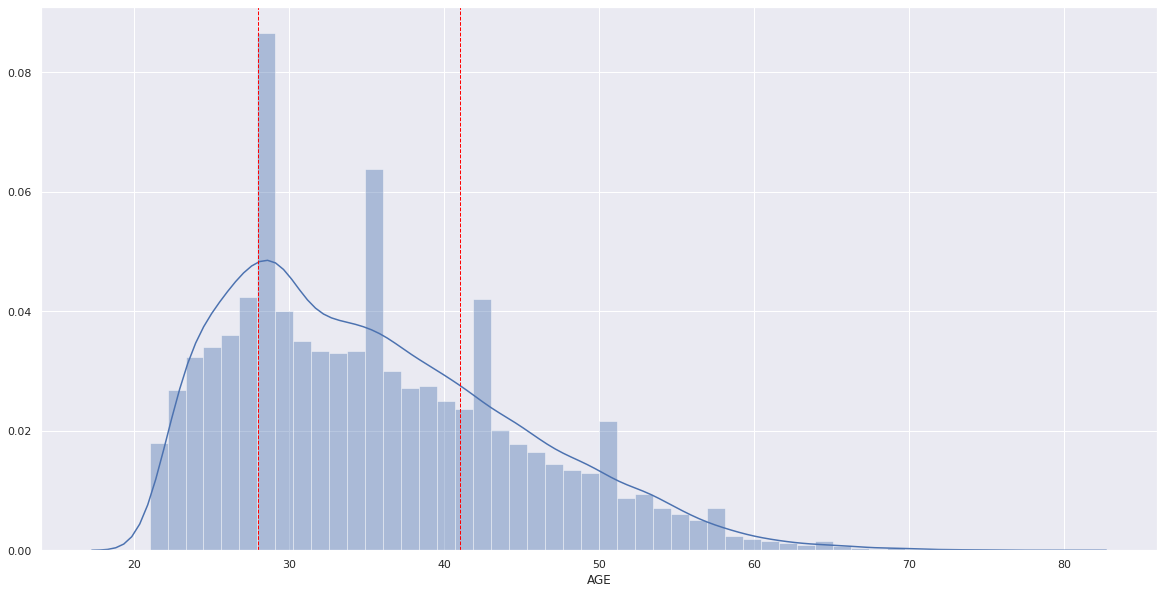

In [ ]:
#AGE - Histogram**

# Getting ID and AGE columns only
age_raw_data = raw_data[["AGE","ID"]]

sns.distplot(age_raw_data["AGE"] )
# plt.xlim(0,)
plt.axvline(28, color='red', linestyle='dashed', linewidth=1)
plt.axvline(41, color='red', linestyle='dashed', linewidth=1)


[INFO] creating woe binning ...


{'AGE': <Figure size 1440x720 with 2 Axes>}

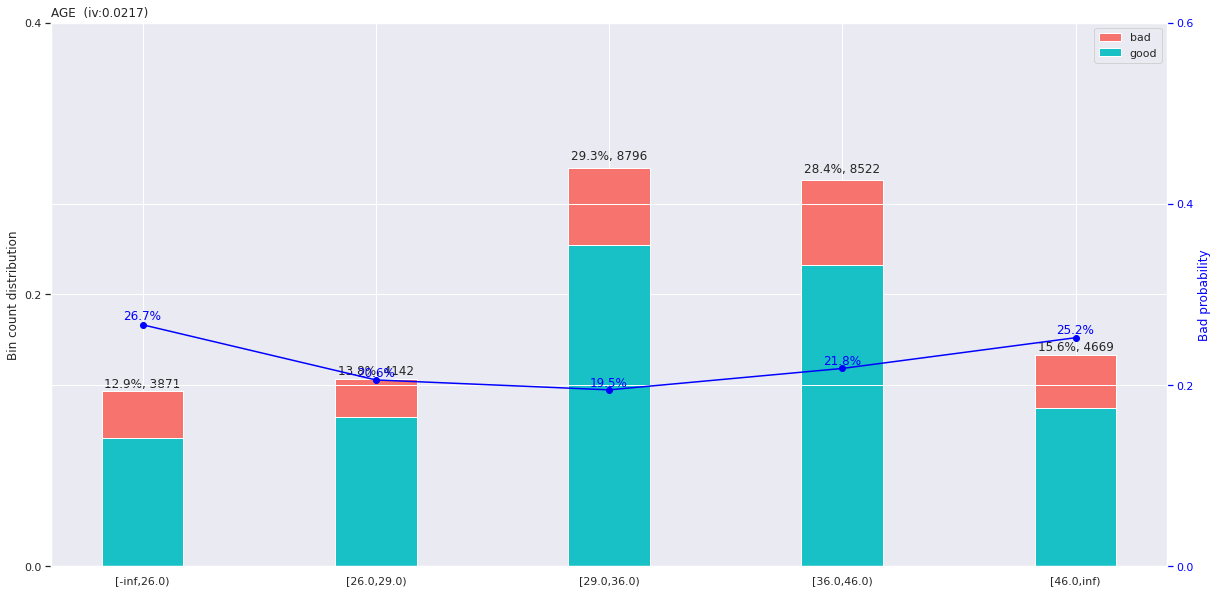

In [ ]:
#AGE - bin analysis** - investigate binning options for variable split
# Check bins LIMIT_BAL

AGE_bins = raw_data[["AGE","DEFAULT"]]
AGE_bins

bins = sc.woebin(AGE_bins, y="DEFAULT")
sc.woebin_plot(bins)

In [ ]:
#AGE recommended transformation** Dummy variables if AGE is below 25, 25:35 & above 40   
#Leave out >35 & < 40 as cross correlation would render this variable irrelevant.

def my_recode8(series):
  if series <= 25 :
    return 1
  else:
    return 0

def my_recode9(series):
  if (series > 25) | (series <= 35):
    return 1
  else:
    return 0
def my_recode10(series):
  if series > 40:
    return 1
  else:
    return 0

raw_data["AGE_below_25"] = raw_data["AGE"].apply(my_recode8)
raw_data["AGE_25to35"] = raw_data["AGE"].apply(my_recode9)  
raw_data["AGE_above_40"] = raw_data["AGE"].apply(my_recode10)     

raw_data[['AGE_below_25','AGE_25to35','AGE_above_40']].describe()

,AGE_below_25,AGE_25to35,AGE_above_40
count,30000.000000,30000.0,30000.000000
mean,0.129033,1.0,0.275800
std,0.335242,0.0,0.446924
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,0.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [ ]:
#Binning for regression analysis - in case of tree analysis, continuous variable recommended.**

## Explore & Transform - 'PAY_X' variables
#data description:** 0 = 'on time payment' - positive #'s = months payment delay.

In [ ]:


raw_data.iloc[ :,[7,8,9]].describe()

,PAY_1,PAY_2,PAY_3
count,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200
std,1.123802,1.197186,1.196868
min,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000


In [ ]:
raw_data.iloc[ :,[10,11,12]].describe()

,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000
mean,-0.220667,-0.266200,-0.291100
std,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000


Text(0.5, 0, 'Repayment status PAY_3')

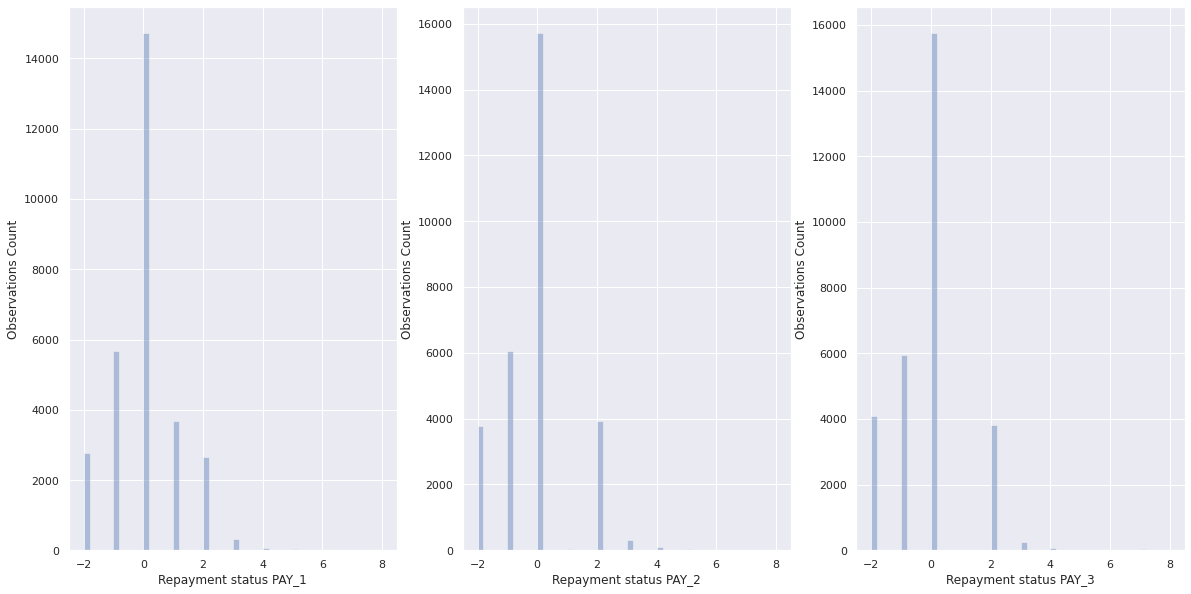

In [ ]:
fig, axs = plt.subplots(ncols=3)
pay_cols_names = [f"PAY_{x}" for x in range(1,7)]
pay_cols_names
sns.distplot(raw_data[pay_cols_names[0]],kde=False, ax=axs[0])
axs[0].set_ylabel("Observations Count")
axs[0].set_xlabel(f"Repayment status {pay_cols_names[0]}")

sns.distplot(raw_data[pay_cols_names[1]],kde=False, ax=axs[1])
axs[1].set_ylabel("Observations Count")
axs[1].set_xlabel(f"Repayment status {pay_cols_names[1]}")

sns.distplot(raw_data[pay_cols_names[2]],kde=False, ax=axs[2])
axs[2].set_ylabel("Observations Count")
axs[2].set_xlabel(f"Repayment status {pay_cols_names[2]}")





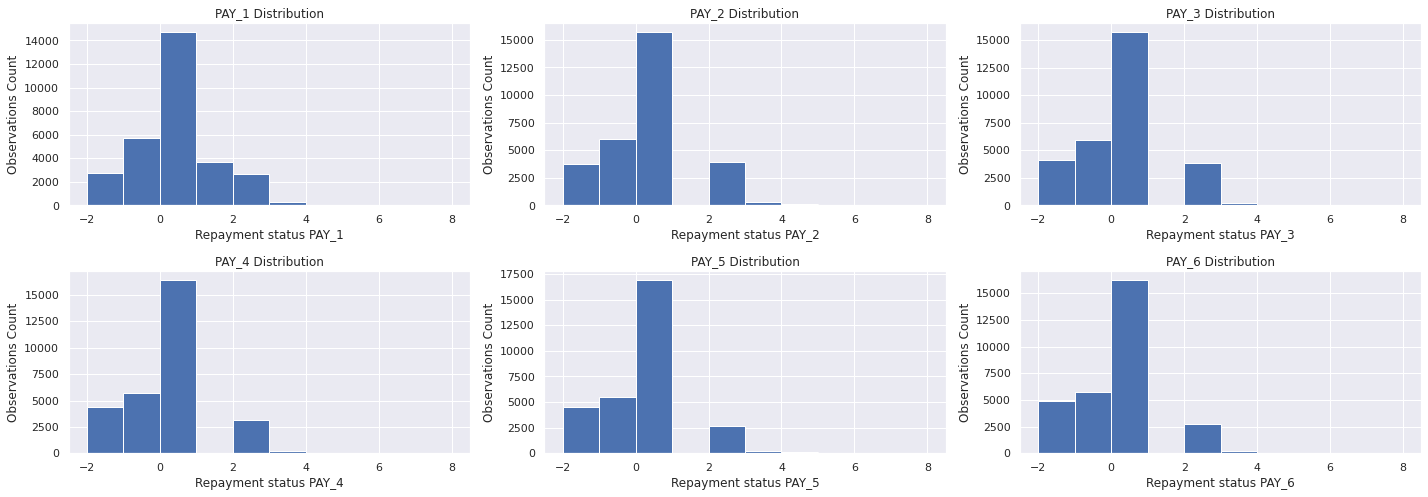

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_ylabel("Observations Count")
        ax.set_xlabel(f"Repayment status {var_name}")

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(raw_data, pay_cols_names, 3, 3)


In [ ]:
#PAY_X observation:** negative numbers to -2 (assumption of pre-payment) up to +8 (default)   
#High cross correlation between PAY_X variables - recommend to summarize PAY_X
pay_cols_names =  ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DEFAULT']
pay_cols_names
PAY_X_correlation = raw_data[pay_cols_names].corr(method="pearson")
PAY_X_correlation["DEFAULT"] 


PAY_1      0.324794
PAY_2      0.263551
PAY_3      0.235253
PAY_4      0.216614
PAY_5      0.204149
PAY_6      0.186866
DEFAULT    1.000000
Name: DEFAULT, dtype: float64

In [ ]:

##PAY_X recommended transformation** create **$PAY_X_Sum_6mo** variable
pay_cols =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
raw_data["PAY_X_Sum_6mo"] = raw_data[pay_cols].sum(axis=1)
raw_data["PAY_X_Sum_6mo"] 
raw_data["PAY_X_Sum_6mo"].describe()

count    30000.000000
mean        -1.094633
std          5.893055
min        -12.000000
25%         -5.000000
50%          0.000000
75%          0.000000
max         36.000000
Name: PAY_X_Sum_6mo, dtype: float64

In [ ]:
#PAY_X_Sum_6mo - recommended transformation** Dummy variables if PAY_X_sum is below 0 or above 5   
#Leave out > 0 to <=5 as cross correlation would render this variable irrelevant.
# bin the Sum as recommended and check correlation
def my_recode11(series):
  if series <=0:
    return 1
  else:
   return 0

def my_recode12(series):
  if series > 5:
    return 1
  else:
   return 0

# raw_data["PAY_X_Sum_6mo"]
raw_data["PAY_X_Sum_6mo_belowZero"] = raw_data["PAY_X_Sum_6mo"].apply(my_recode11)
raw_data["PAY_X_Sum_6mo_aboveFive"] = raw_data["PAY_X_Sum_6mo"].apply(my_recode12)
raw_data[['PAY_X_Sum_6mo_belowZero', "PAY_X_Sum_6mo_aboveFive"]].describe()
# raw_data.head()

,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive
count,30000.000000,30000.000000
mean,0.762233,0.106100
std,0.425723,0.307971
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
#PAY_X_Sum_6mo - observation:** binning PAY_X_Sum as per WOE maximizes correlation variance   
# check correlation of PAY_X Sum Variable
PAY_X_correlation2 = raw_data[['PAY_X_Sum_6mo_belowZero','PAY_X_Sum_6mo_aboveFive','DEFAULT']].corr(method="pearson")
PAY_X_correlation2




,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive,DEFAULT
PAY_X_Sum_6mo_belowZero,1.000000,-0.616853,-0.358278
PAY_X_Sum_6mo_aboveFive,-0.616853,1.000000,0.340816
DEFAULT,-0.358278,0.340816,1.000000


In [ ]:
raw_data.iloc[:,13:16 ].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3
count,30000.000000,30000.000000,3.000000e+04
mean,51223.330900,49179.075167,4.701315e+04
std,73635.860576,71173.768783,6.934939e+04
min,-165580.000000,-69777.000000,-1.572640e+05
25%,3558.750000,2984.750000,2.666250e+03
50%,22381.500000,21200.000000,2.008850e+04
75%,67091.000000,64006.250000,6.016475e+04
max,964511.000000,983931.000000,1.664089e+06


In [ ]:
raw_data.iloc[:,16:19 ].describe()

,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000
mean,43262.948967,40311.400967,38871.760400
std,64332.856134,60797.155770,59554.107537
min,-170000.000000,-81334.000000,-339603.000000
25%,2326.750000,1763.000000,1256.000000
50%,19052.000000,18104.500000,17071.000000
75%,54506.000000,50190.500000,49198.250000
max,891586.000000,927171.000000,961664.000000


In [ ]:
#BILL_AmtX - Histogram**
# Getting BILL_AMT1..6 columns only
bill_raw_data = raw_data.iloc[:,13:19]  
# bill_raw_data
bill_raw_data.quantile([.1,.75], axis = 0)




,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0.10,278.9,0.00,0.00,0.0,0.0,0.00
0.75,67091.0,64006.25,60164.75,54506.0,50190.5,49198.25


In [ ]:
# dealing with outliers using IQR technique
Q1 = bill_raw_data.quantile(0.25)
Q3 = bill_raw_data.quantile(0.75)
IQR = Q3- Q1
print(IQR) 
# removing outlier 
bill_raw_data = bill_raw_data[~((bill_raw_data < (Q1-1.5 * IQR)) |(bill_raw_data > (Q3 + 1.5 * IQR))).any(axis=1)]


BILL_AMT1    63532.25
BILL_AMT2    61021.50
BILL_AMT3    57498.50
BILL_AMT4    52179.25
BILL_AMT5    48427.50
BILL_AMT6    47942.25
dtype: float64


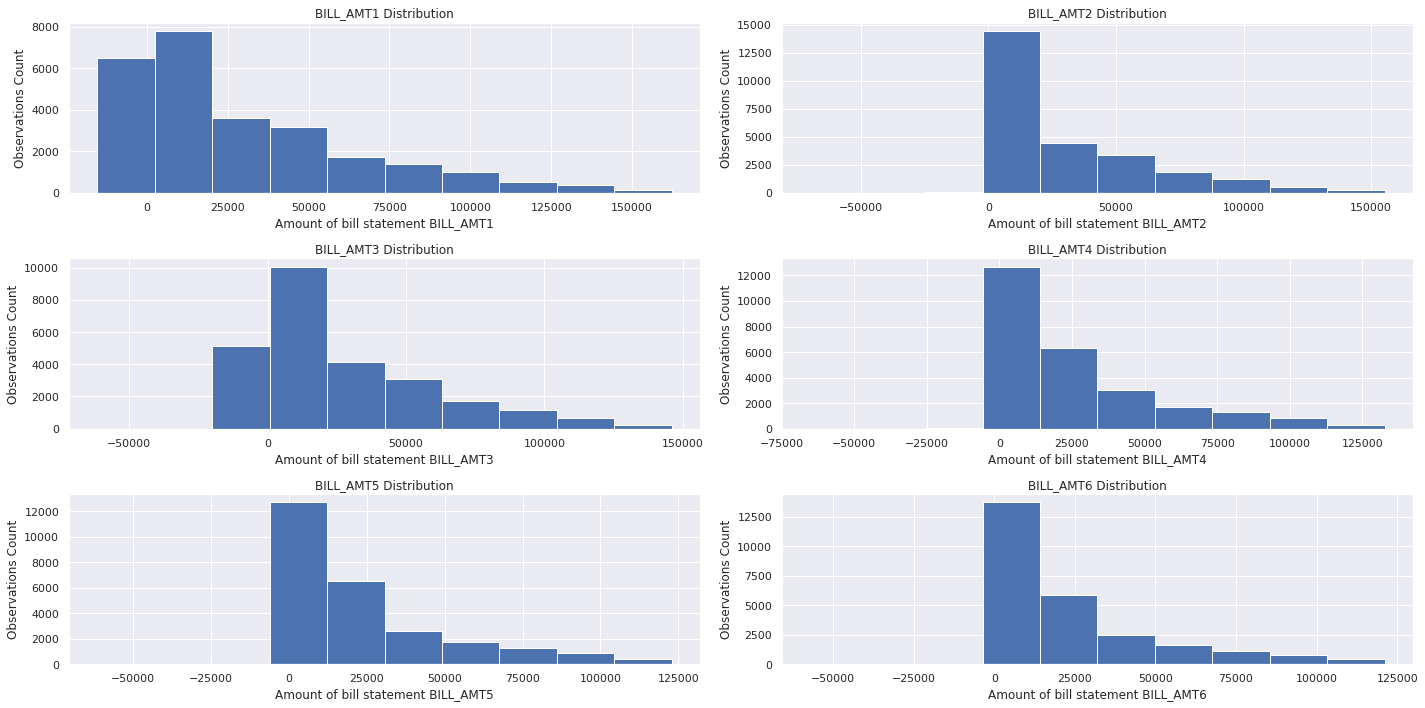

In [ ]:
# multiple plots
bill_cols=list(bill_raw_data.columns)
def draw_histograms2(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_ylabel("Observations Count")
        ax.set_xlabel(f"Amount of bill statement {var_name}")

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms2(bill_raw_data, bill_cols, 3, 2)



In [ ]:
#BILL_AmtX - observation** ...  
#High cross correlation between BILL_X variables - recommend to summarize BILL_X
# check correlation of BILL_X Sum Variable
BILL_X_correlation = raw_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','DEFAULT']].corr(method="pearson")

BILL_X_correlation.iloc[: , 6]

BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
DEFAULT      1.000000
Name: DEFAULT, dtype: float64

In [ ]:
#**BILL_AmtX - recommended transformation** develop variable to capture bill/pay ratio

# option 1: sum of all bill values
raw_data["BILL_SUM"] = raw_data[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].sum(axis=1)
# # option 2: average bill amt
raw_data["Avg_Bill_Amt"] = raw_data["BILL_SUM"]/6
# # option 3: max bill over 6 months
raw_data["Max_Bill_Amt"] = raw_data[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].max(axis=1)
raw_data["Max_Bill_Amt_Sq"] = raw_data["Max_Bill_Amt"]**2
raw_data["Max_Bill_Amt_Sqrt"] = raw_data["Max_Bill_Amt"]**(1/2)
raw_data["Max_Bill_Amt_Log"] = np.log(raw_data["Max_Bill_Amt"])
raw_data
# np.log(7704)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k,SEX_FEMALE,Married_Y,ED_Grad_other,AGE_below_25,AGE_25to35,AGE_above_40,PAY_X_Sum_6mo,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive,BILL_SUM,Avg_Bill_Amt,Max_Bill_Amt,Max_Bill_Amt_Sq,Max_Bill_Amt_Sqrt,Max_Bill_Amt_Log
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.287578,1,0,0,1,1,0,1,1,0,1,1,0,-2,1,0,7704,1284.000000,3913,15311569,62.553977,8.272060
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.788305,0,0,1,3,0,0,1,0,0,0,1,0,3,0,0,17077,2846.166667,3455,11937025,58.779248,8.147578
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.408977,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,101653,16942.166667,29239,854919121,170.994152,10.283259
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.883017,0,0,1,3,0,0,1,1,0,0,1,0,0,1,0,231334,38555.666667,49291,2429602681,222.015765,10.805497
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.940467,0,0,1,3,0,0,0,1,0,0,1,1,-2,1,0,109339,18223.166667,35835,1284147225,189.301347,10.486680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0.284993,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,725349,120891.500000,208365,43415973225,456.470152,12.247047
29996,29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0.835216,0,0,1,3,0,0,0,0,0,0,1,1,-4,1,0,21182,3530.333333,8979,80622441,94.757585,9.102644
29997,29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0.514152,0,1,0,2,1,0,0,0,0,0,1,0,8,0,1,70496,11749.333333,20878,435890884,144.492214,9.946451
29998,29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,0.057521,1,0,0,1,0,0,0,1,0,0,1,1,-1,1,0,266611,44435.166667,78379,6143267641,279.962497,11.269311


In [ ]:
#BILL_X - analyze most highly correlated variable type**
# check correlation of BILL_X Sum Variable

BILL_X_correlation = raw_data[['BILL_SUM','Avg_Bill_Amt',
                                      'Max_Bill_Amt','Max_Bill_Amt_Sq',
                                      'DEFAULT']].corr(method="pearson")
BILL_X_correlation.iloc[:,4]

BILL_SUM          -0.012691
Avg_Bill_Amt      -0.012691
Max_Bill_Amt      -0.040913
Max_Bill_Amt_Sq   -0.016136
DEFAULT            1.000000
Name: DEFAULT, dtype: float64

In [ ]:
#**Max_Bill_Amt - Histogram**

Max_bill_df = raw_data[['ID','Max_Bill_Amt']]

Max_bill_df["Max_Bill_Amt"].describe()

count    3.000000e+04
mean     6.057244e+04
std      7.840481e+04
min     -6.029000e+03
25%      1.006000e+04
50%      3.120850e+04
75%      7.959900e+04
max      1.664089e+06
Name: Max_Bill_Amt, dtype: float64

In [ ]:
## **Max_Bill_Amt - bin analysis** - investigate binning options for variable split


# check WOE recommended binning and correlation in PAY_X



In [ ]:
#Max_Bill_Amt - recommended transformation** Create bins for Max_Bill variable as per WOE max  
#Leave out > 21k & <= 52k as cross correlation would render this variable irrelevant.   
# bin the Sum as recommended and check correlation
def my_recode13(series):
  if series <= 600:
    return 1
  else:
    return 0
def my_recode14(series):
  if (series > 600) | (series <= 4000):
    return 1
  else:
    return 0

def my_recode15(series):
  if (series > 4000) | (series <= 18400):
    return 1
  else:
    return 0

def my_recode16(series):
  if (series > 18400) | (series <= 21000):
    return 1
  else:
    return 0

def my_recode17(series):
  if (series > 52000):
    return 1
  else:
    return 0


raw_data["Max_Bill_Amt_below_600"] = raw_data["Max_Bill_Amt"].apply(my_recode13)
raw_data["Max_Bill_Amt_below_4k"] = raw_data["Max_Bill_Amt"].apply(my_recode14)
raw_data["Max_Bill_Amt_below_18k"] = raw_data["Max_Bill_Amt"].apply(my_recode15)
raw_data["Max_Bill_Amt_below_21k"] = raw_data["Max_Bill_Amt"].apply(my_recode16)
raw_data["Max_Bill_Amt_above_52k"] = raw_data["Max_Bill_Amt"].apply(my_recode17)

raw_data[['Max_Bill_Amt_below_600','Max_Bill_Amt_below_4k',
                   'Max_Bill_Amt_below_18k','Max_Bill_Amt_below_21k',
                   'Max_Bill_Amt_above_52k']]


,Max_Bill_Amt_below_600,Max_Bill_Amt_below_4k,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k
0,0,1,1,1,0
1,0,1,1,1,0
2,0,1,1,1,0
3,0,1,1,1,0
4,0,1,1,1,0
...,...,...,...,...,...
29995,0,1,1,1,1
29996,0,1,1,1,0
29997,0,1,1,1,0
29998,0,1,1,1,1


In [ ]:
#**Max_Bill_Amt - Histogram**
Max_bill_df = raw_data[['ID','Max_Bill_Amt']]
Max_bill_df["Max_Bill_Amt"].describe()


count    3.000000e+04
mean     6.057244e+04
std      7.840481e+04
min     -6.029000e+03
25%      1.006000e+04
50%      3.120850e+04
75%      7.959900e+04
max      1.664089e+06
Name: Max_Bill_Amt, dtype: float64

In [ ]:
#**Max_Bill_Amt - observation:** binning PAY_X_Sum as per WOE maximizes correlation variance   
# check correlation of PAY_X Sum Variable
Max_Bill_correlation = raw_data[['Max_Bill_Amt_below_600','Max_Bill_Amt_below_4k','Max_Bill_Amt_below_18k','Max_Bill_Amt_below_21k','Max_Bill_Amt_above_52k','DEFAULT']].corr()


Max_Bill_correlation

,Max_Bill_Amt_below_600,Max_Bill_Amt_below_4k,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k,DEFAULT
Max_Bill_Amt_below_600,1.000000,NaN,NaN,NaN,-0.169761,0.053185
Max_Bill_Amt_below_4k,NaN,NaN,NaN,NaN,NaN,NaN
Max_Bill_Amt_below_18k,NaN,NaN,NaN,NaN,NaN,NaN
Max_Bill_Amt_below_21k,NaN,NaN,NaN,NaN,NaN,NaN
Max_Bill_Amt_above_52k,-0.169761,NaN,NaN,NaN,1.000000,-0.055722
DEFAULT,0.053185,NaN,NaN,NaN,-0.055722,1.000000


In [ ]:
#**Binning for regression analysis - in case of tree analysis, continuous variable recommended.** 

## Explore & Transform - PAY_AMTX
#**data description:** the amount Paid against prior Bill (x-1) for 6 months April (1) to September (6)   

raw_data.iloc[:,19:22].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3
count,30000.000000,3.000000e+04,30000.00000
mean,5663.580500,5.921163e+03,5225.68150
std,16563.280354,2.304087e+04,17606.96147
min,0.000000,0.000000e+00,0.00000
25%,1000.000000,8.330000e+02,390.00000
50%,2100.000000,2.009000e+03,1800.00000
75%,5006.000000,5.000000e+03,4505.00000
max,873552.000000,1.684259e+06,896040.00000


In [ ]:
raw_data.iloc[:,22:25].describe()

,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000
mean,4826.076867,4799.387633,5215.502567
std,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000,0.000000
25%,296.000000,252.500000,117.750000
50%,1500.000000,1500.000000,1500.000000
75%,4013.250000,4031.500000,4000.000000
max,621000.000000,426529.000000,528666.000000


In [ ]:

#PAY_AMTX - Histogram**
# Getting PAY_AMTX1..6 columns only
pay_amt = raw_data.iloc[:, 19:25]
Q1 = pay_amt.quantile(0.25)
Q3 = pay_amt.quantile(0.5)
IQR = Q3-Q1
print(IQR)
# removing outlier 
pay_amt = pay_amt[~((pay_amt < (Q1-1.5 * IQR)) |(pay_amt > (Q3 + 1.5 * IQR))).any(axis=1)]

PAY_AMT1    1100.00
PAY_AMT2    1176.00
PAY_AMT3    1410.00
PAY_AMT4    1204.00
PAY_AMT5    1247.50
PAY_AMT6    1382.25
dtype: float64


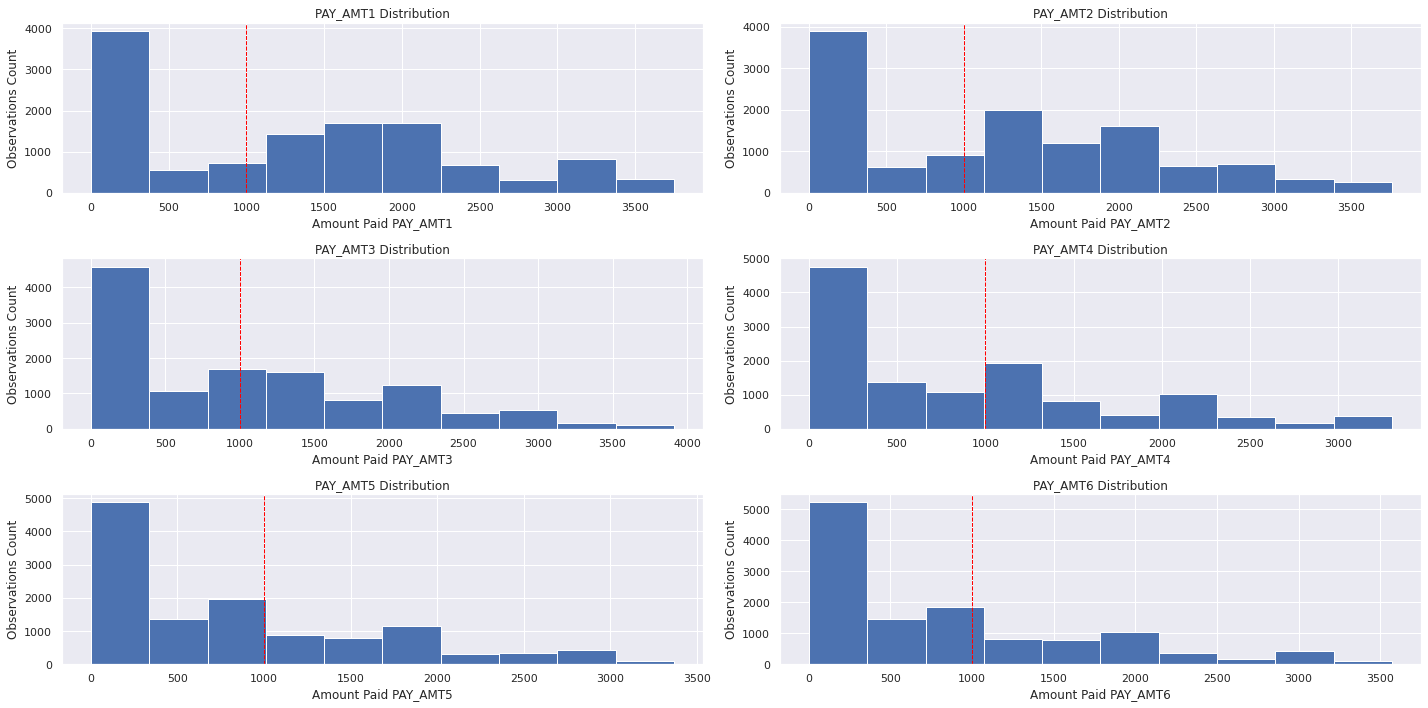

In [ ]:
pay_amt # multiple plots
pay_cols=list(pay_amt.columns)
def draw_histograms3(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_ylabel("Observations Count")
        plt.axvline(1000, color='red', linestyle='dashed', linewidth=1)
        plt.axvline(1000, color='red', linestyle='dashed', linewidth=1)
        ax.set_xlabel(f"Amount Paid {var_name}")

    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms3(pay_amt, pay_cols, 3, 2)



In [ ]:

#PAY_AMTX - observation:** ...  
#High cross correlation between BILL_X variables - recommend to summarize BILL_X
# check correlation of BILL_X Sum Variable
PAY_AMTX_correlation = raw_data[['PAY_AMT1','PAY_AMT2',
            'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','DEFAULT']].corr()

PAY_AMTX_correlation["DEFAULT"]

PAY_AMT1   -0.072929
PAY_AMT2   -0.058579
PAY_AMT3   -0.056250
PAY_AMT4   -0.056827
PAY_AMT5   -0.055124
PAY_AMT6   -0.053183
DEFAULT     1.000000
Name: DEFAULT, dtype: float64

In [ ]:
#PAY_AMTX - recommended transformation** develop variable to capture pay ratio
# option 1: sum of all bill values

raw_data["PMT_SUM"] = raw_data[["PAY_AMT1","PAY_AMT2",
                                  "PAY_AMT3","PAY_AMT4",
                                  "PAY_AMT5","PAY_AMT6"]].sum(axis=1)
# option 2: average bill amt
raw_data["Avg_Pmt_Amt"] = raw_data["PMT_SUM"]/6
# option 3: max bill over 6 months
## Create column Max_Bill_Amt ##
raw_data["Max_Pmt_Amt"] =  raw_data[["PAY_AMT1","PAY_AMT2",
                                  "PAY_AMT3","PAY_AMT4",
                                  "PAY_AMT5","PAY_AMT6"]].max(axis=1)
raw_data



,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k,SEX_FEMALE,Married_Y,ED_Grad_other,AGE_below_25,AGE_25to35,AGE_above_40,PAY_X_Sum_6mo,PAY_X_Sum_6mo_belowZero,PAY_X_Sum_6mo_aboveFive,BILL_SUM,Avg_Bill_Amt,Max_Bill_Amt,Max_Bill_Amt_Sq,Max_Bill_Amt_Sqrt,Max_Bill_Amt_Log,Max_Bill_Amt_below_600,Max_Bill_Amt_below_4k,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k,PMT_SUM,Avg_Pmt_Amt,Max_Pmt_Amt
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.287578,1,0,0,1,1,0,1,1,0,1,1,0,-2,1,0,7704,1284.000000,3913,15311569,62.553977,8.272060,0,1,1,1,0,689,114.833333,689
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.788305,0,0,1,3,0,0,1,0,0,0,1,0,3,0,0,17077,2846.166667,3455,11937025,58.779248,8.147578,0,1,1,1,0,5000,833.333333,2000
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.408977,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,101653,16942.166667,29239,854919121,170.994152,10.283259,0,1,1,1,0,11018,1836.333333,5000
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.883017,0,0,1,3,0,0,1,1,0,0,1,0,0,1,0,231334,38555.666667,49291,2429602681,222.015765,10.805497,0,1,1,1,0,8388,1398.000000,2019
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.940467,0,0,1,3,0,0,0,1,0,0,1,1,-2,1,0,109339,18223.166667,35835,1284147225,189.301347,10.486680,0,1,1,1,0,59049,9841.500000,36681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0.284993,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,725349,120891.500000,208365,43415973225,456.470152,12.247047,0,1,1,1,1,42550,7091.666667,20000
29996,29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0.835216,0,0,1,3,0,0,0,0,0,0,1,1,-4,1,0,21182,3530.333333,8979,80622441,94.757585,9.102644,0,1,1,1,0,14490,2415.000000,8998
29997,29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0.514152,0,1,0,2,1,0,0,0,0,0,1,0,8,0,1,70496,11749.333333,20878,435890884,144.492214,9.946451,0,1,1,1,0,31300,5216.666667,22000
29998,29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,0.057521,1,0,0,1,0,0,0,1,0,0,1,1,-1,1,0,266611,44435.166667,78379,6143267641,279.962497,11.269311,0,1,1,1,1,147181,24530.166667,85900


In [ ]:
#**Avg_Pmt_Amt - Histogram**

Avg_Pmt_df = raw_data[['ID','Avg_Pmt_Amt']]
Avg_Pmt_df["Avg_Pmt_Amt"].describe()

count     30000.000000
mean       5275.232094
std       10137.946323
min           0.000000
25%        1113.291667
50%        2397.166667
75%        5583.916667
max      627344.333333
Name: Avg_Pmt_Amt, dtype: float64

In [ ]:
#Avg_Pmt_Amt - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X


In [ ]:
#Avg_Pmt_Amt - recommended transformation** Create bins for Avg_Pmt variable as per WOE max  
#Leave out > 2k & <= 12k as cross correlation would render this variable irrelevant.   
# bin the Sum as recommended and check correlation

In [ ]:
#Avg_Pmt_Amt - recommended transformation** Create bins for Avg_Pmt variable as per WOE max  
#Leave out > 2k & <= 12k as cross correlation would render this variable irrelevant.   
# bin the Sum as recommended and check correlation
def my_recode15(series):
  if series <= 2045:
    return 1
  else:
    return 0

def my_recode16(series):
  if series > 12000:
    return 1
  else:
    return 0

raw_data["Avg_Pmt_Amt_below2k"] = raw_data["Avg_Pmt_Amt"].apply(my_recode15)
raw_data["Avg_Pmt_Amt_above12k"] = raw_data["Avg_Pmt_Amt"].apply(my_recode16)

raw_data[['Avg_Pmt_Amt_below2k','Avg_Pmt_Amt_above12k']].describe()


,Avg_Pmt_Amt_below2k,Avg_Pmt_Amt_above12k
count,30000.000000,30000.000000
mean,0.450000,0.099500
std,0.497502,0.299337
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
#**Avg_Pmt_Amt - observation:** binning PAY_X_Sum as per WOE maximizes correlation variance   

# check correlation of PAY_X Sum Variable
Avg_Pmt_correlation = raw_data[['Avg_Pmt_Amt_below2k','Avg_Pmt_Amt_above12k','DEFAULT']].corr()

Avg_Pmt_correlation 

,Avg_Pmt_Amt_below2k,Avg_Pmt_Amt_above12k,DEFAULT
Avg_Pmt_Amt_below2k,1.000000,-0.300673,0.156071
Avg_Pmt_Amt_above12k,-0.300673,1.000000,-0.100688
DEFAULT,0.156071,-0.100688,1.000000


In [ ]:
## Create new variable: Avg_Util
#Avg_Util - data description**  amount of balance limit used (BILL_AMTX/LIMIT_BAL)

raw_data["Util_Bill_1"] = raw_data["BILL_AMT1"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_2"] = raw_data["BILL_AMT2"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_3"] = raw_data["BILL_AMT3"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_4"] = raw_data["BILL_AMT4"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_5"] = raw_data["BILL_AMT5"] / raw_data["LIMIT_BAL"]
raw_data["Util_Bill_6"] = raw_data["BILL_AMT6"] /raw_data["LIMIT_BAL"]

raw_data["Util_SUM"] = raw_data[["Util_Bill_1", "Util_Bill_2", "Util_Bill_3", "Util_Bill_4", "Util_Bill_5", "Util_Bill_6"]].sum(axis=1)

raw_data['Avg_Util'] = raw_data["Util_SUM"]/6
raw_data["Avg_Util"].describe()


count    30000.000000
mean         0.373048
std          0.351890
min         -0.232590
25%          0.029997
50%          0.284834
75%          0.687929
max          5.364308
Name: Avg_Util, dtype: float64

In [ ]:
#**Avg_Util - Histogram**
# Getting ID and Avg_Util columns only

(-0.1, 1.0)

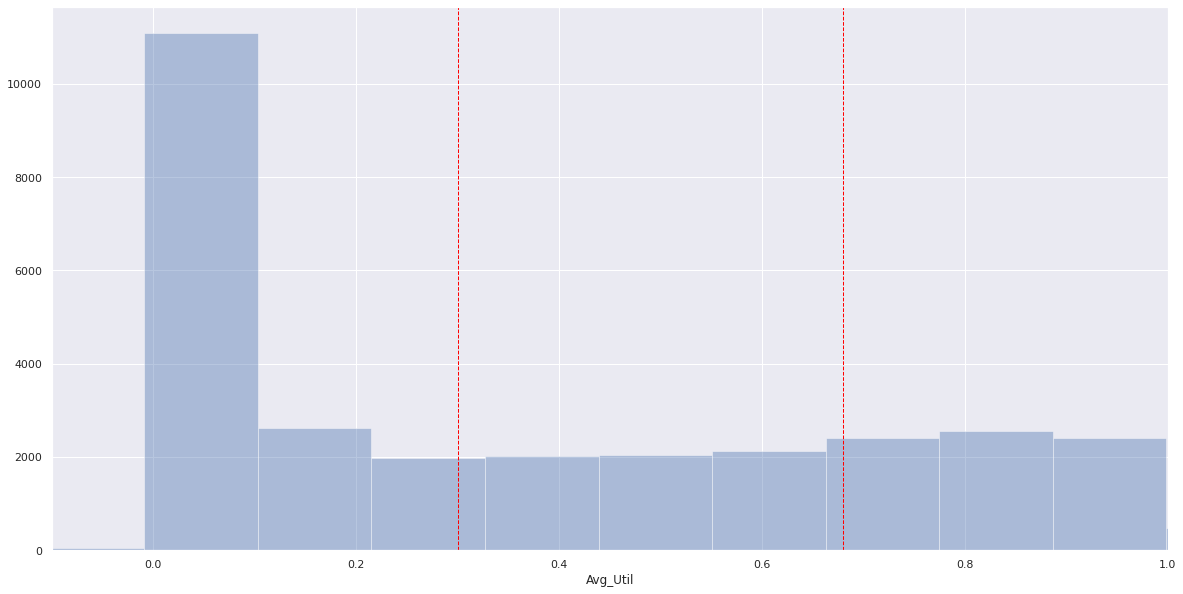

In [ ]:

# Generating a histogram for the LIMIT_BAL variable with a vertical cutoff line

Avg_Util_df = raw_data['Avg_Util']
sns.distplot(Avg_Util_df, kde=False )
plt.axvline(0.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(0.68, color='red', linestyle='dashed', linewidth=1)
plt.xlim([-0.1,1])


In [ ]:
#**Avg_Util - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X
Avg_Util_bins = raw_data[["Avg_Util","DEFAULT"]]
Avg_Util_bin=woeBinningPandas.woe_binning(Avg_Util_bins,"DEFAULT","Avg_Util", 0.05, 0, 0.1, 50, 'DEFAULT')

# bins results
Avg_Util_bin

,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, 0.001019933333]",41.138914,-inf,0.00101993,0.102991,450,1050,0.067812,0.044941,0.009409
"(0.001019933333, 0.4517598519]",-31.794693,0.00102,0.45176,0.102991,2826,13674,0.425859,0.585259,0.050681
"(0.4517598519, inf]",31.422540,0.45176,inf,0.102991,3360,8640,0.506329,0.369800,0.042901
Missing,NaN,inf,Missing,0.102991,0,0,0.000000,0.000000,NaN


In [ ]:

#**Avg_Util - recommended transformation** Create bins for Avg_Util variable as per WOE max  
#Leave out > .001 & <= .45 as cross correlation would render this variable irrelevant.   
def recode1(series):
  if series <= .001:
    return 1
  else:
    return 0

def recode2(series):
  if series <= .45:
    return 1
  else:
    return 0



raw_data['Avg_Util_below_.001'] = raw_data['Avg_Util'].apply(recode1)
raw_data["Avg_Util_above_.45"] = raw_data['Avg_Util'].apply(recode2)
raw_data[['Avg_Util_below_.001','Avg_Util_above_.45']].describe()



,Avg_Util_below_.001,Avg_Util_above_.45
count,30000.000000,30000.000000
mean,0.049733,0.598733
std,0.217397,0.490163
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
## Create new variable: Avg_Pay_Ratio
#**Avg_Pay_Ratio - data description**  amount paid against bill (BILL_AMTX+1/PAY_AMTX)

raw_data["Pay_Ratio_1"] =np.where(raw_data["BILL_AMT2"] > 0,(raw_data["PAY_AMT1"] / raw_data["BILL_AMT2"]) , 1)
raw_data["Pay_Ratio_2"] =np.where(raw_data["BILL_AMT3"] > 0,(raw_data["PAY_AMT2"] / raw_data["BILL_AMT3"]) , 1)
raw_data["Pay_Ratio_3"] =np.where(raw_data["BILL_AMT4"] > 0,(raw_data["PAY_AMT3"] / raw_data["BILL_AMT4"]) , 1)
raw_data["Pay_Ratio_4"] =np.where(raw_data["BILL_AMT5"] > 0,(raw_data["PAY_AMT4"] / raw_data["BILL_AMT5"]) , 1)
raw_data["Pay_Ratio_5"] =np.where(raw_data["BILL_AMT6"] > 0,(raw_data["PAY_AMT5"] / raw_data["BILL_AMT6"]) , 1)

raw_data["Ratio_SUM"] = raw_data[["Pay_Ratio_1","Pay_Ratio_2","Pay_Ratio_3","Pay_Ratio_4","Pay_Ratio_5"]].sum(axis=1)

raw_data["Avg_Pay_Ratio"] = raw_data["Ratio_SUM"]/5
raw_data["Avg_Pay_Ratio"].describe()

count    30000.000000
mean         0.576423
std         16.499616
min          0.000000
25%          0.047855
50%          0.197668
75%          0.903817
max       2667.199955
Name: Avg_Pay_Ratio, dtype: float64

(-0.1, 1.2)

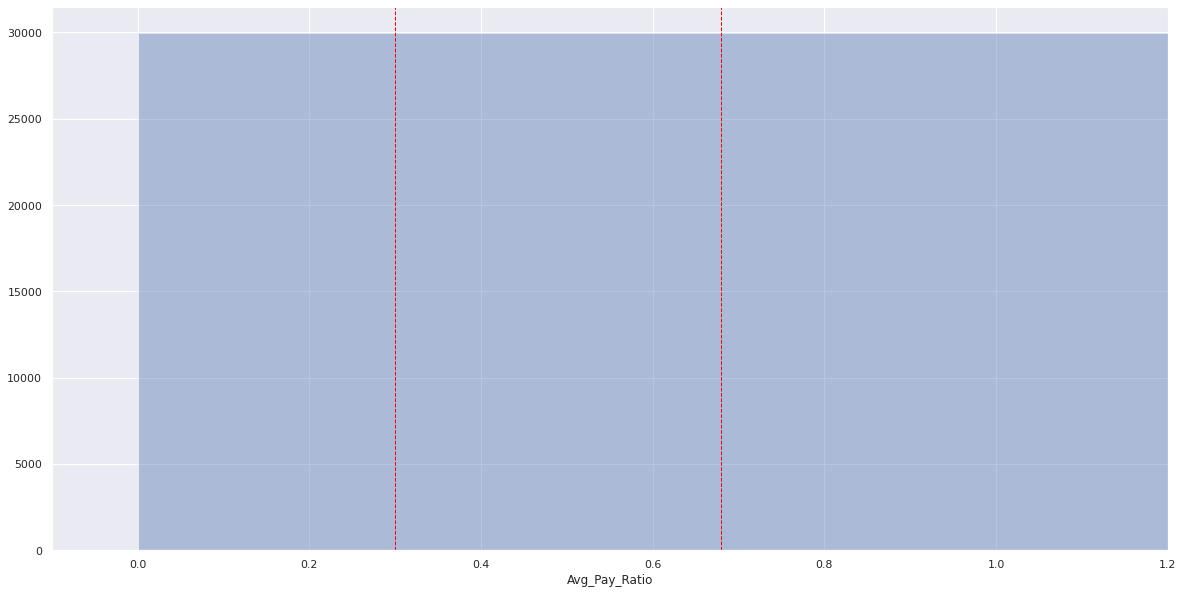

In [ ]:
#**Avg_Pay_Ratio - Histogram**
# Getting ID and Avg_Util columns only

sns.distplot(raw_data['Avg_Pay_Ratio'], kde=False )
# raw_data['Avg_Pay_Ratio'].hist()
plt.axvline(0.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(0.68, color='red', linestyle='dashed', linewidth=1)
plt.xlim([-0.1,1.2])


In [ ]:
#**Avg_Pay_Ratio - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X
Avg_Pay_Ratio_bins = raw_data[["Avg_Pay_Ratio","DEFAULT"]]
Avg_Pay_Ratio_bin=woeBinningPandas.woe_binning(Avg_Pay_Ratio_bins,"DEFAULT","Avg_Pay_Ratio", 0.05, 0, 0.1, 50, 'DEFAULT')

Avg_Pay_Ratio_bin

,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, 0.03529546888]",112.247680,-inf,0.0352955,0.160059,699,801,0.105335,0.034284,0.079753
"(0.03529546888, 0.1134000136]",17.645220,0.035295,0.1134,0.160059,3037,8963,0.457655,0.383624,0.013063
"(0.1134000136, 1.0]",-18.940822,0.113400,1,0.160059,2549,10846,0.384117,0.464218,0.015172
"(1.0, inf]",-80.133645,1.000000,inf,0.160059,351,2754,0.052893,0.117874,0.052071
Missing,NaN,inf,Missing,0.160059,0,0,0.000000,0.000000,NaN


In [ ]:
#**Avg_Pay_Ratio - recommended transformation** Create bins as per WOE max  
#Leave out > .113 & <= 1 as cross correlation would render this variable irrelevant.   
## split Avg_Pay_Ratio into 3 groups: <= .035, <= .113, <= 1, > 1
raw_data["Avg_Pay_Ratio_below_.035" ]= np.where(raw_data["Avg_Pay_Ratio"] <= .035,1,0)
raw_data["Avg_Pay_Ratio_above_.113"] = np.where((raw_data["Avg_Pay_Ratio"]  > .035) |
                                              (raw_data["Avg_Pay_Ratio"]  <= .113),1,0)
raw_data['Avg_Pay_Ratio_above_1'] = np.where(raw_data["Avg_Pay_Ratio"]  > 1,1,0)
raw_data[['Avg_Pay_Ratio_below_.035','Avg_Pay_Ratio_above_.113','Avg_Pay_Ratio_above_1']].describe()


,Avg_Pay_Ratio_below_.035,Avg_Pay_Ratio_above_.113,Avg_Pay_Ratio_above_1
count,30000.000000,30000.0,30000.000000
mean,0.047333,1.0,0.103500
std,0.212354,0.0,0.304616
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,0.000000,1.0,0.000000
max,1.000000,1.0,1.000000


In [ ]:
## Create new variable: Max_DLQ
##**Max_DLQ - data description**  max value in PAY_X variables across period
## Create column Max_DLQ ##

raw_data["Max_DLQa"] = raw_data[["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].max(axis=1)
raw_data["Max_DLQ"] = np.where(raw_data["Max_DLQa"] <= 0,0,raw_data["Max_DLQa"])
raw_data["Max_DLQ"].describe()

count    30000.000000
mean         0.682200
std          1.073518
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          8.000000
Name: Max_DLQ, dtype: float64

In [ ]:
DLQ_summary = raw_data['Max_DLQ'].value_counts()
DLQ_table = pd.DataFrame(DLQ_summary).reset_index()
DLQ_table.columns = ['Max_DLQ','Freq']
DLQ_table["PCT"] = DLQ_table['Freq']/30000
DLQ_table["PCT"] = DLQ_table["PCT"].apply(my_recode5)
DLQ_table

,Max_DLQ,Freq,PCT
0,0,19931,66.4 %
1,2,7187,24.0 %
2,1,1689,5.6 %
3,3,789,2.6 %
4,4,218,0.7 %
5,5,69,0.2 %
6,7,67,0.2 %
7,8,25,0.1 %
8,6,25,0.1 %


In [ ]:
#**Max_DLQ - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X
Max_DLQ_bins = raw_data[["Max_DLQ","DEFAULT"]]
Max_DLQ_bin = woeBinningPandas.woe_binning(Max_DLQ_bins,"DEFAULT","Max_DLQ", 0.05, 0, 0.1, 50, 'DEFAULT')

Max_DLQ_bin 


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, 1.0]",-66.478799,-inf,inf,0.696043,2756,18864,0.41531,0.807396,0.260654
"(1.0, inf]",111.044476,inf,Missing,0.696043,3880,4500,0.58469,0.192604,0.435389
Missing,NaN,NaN,NaN,0.696043,0,0,0.00000,0.000000,NaN


In [ ]:
#*Max_DLQ - recommended transformation** Create bins as per WOE max  
#Leave out <= 1 as cross correlation would render this variable irrelevant.   
## split Max_DLQ above 1
raw_data['Max_DLQ_above1'] = np.where(raw_data["Max_DLQ"] > 1,1,0)
raw_data['Max_DLQ_above1'].describe() 

count    30000.000000
mean         0.279333
std          0.448679
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Max_DLQ_above1, dtype: float64

In [ ]:

## Create new variables: Bal_Growth_6mo
#**Bal_Growth_6mo - data description**  change in credit balance over period ()

raw_data['Balance_Growth_6mo'] = (raw_data["LIMIT_BAL"]-raw_data["BILL_AMT6"]) - (raw_data["LIMIT_BAL"]-raw_data["BILL_AMT1"])
raw_data["Balance_Growth_6mo"].describe()


count     30000.000000
mean      12351.570500
std       43922.421534
min     -428791.000000
25%       -2963.000000
50%         923.000000
75%       19793.750000
max      708323.000000
Name: Balance_Growth_6mo, dtype: float64

(-3000.0, 20000.0)

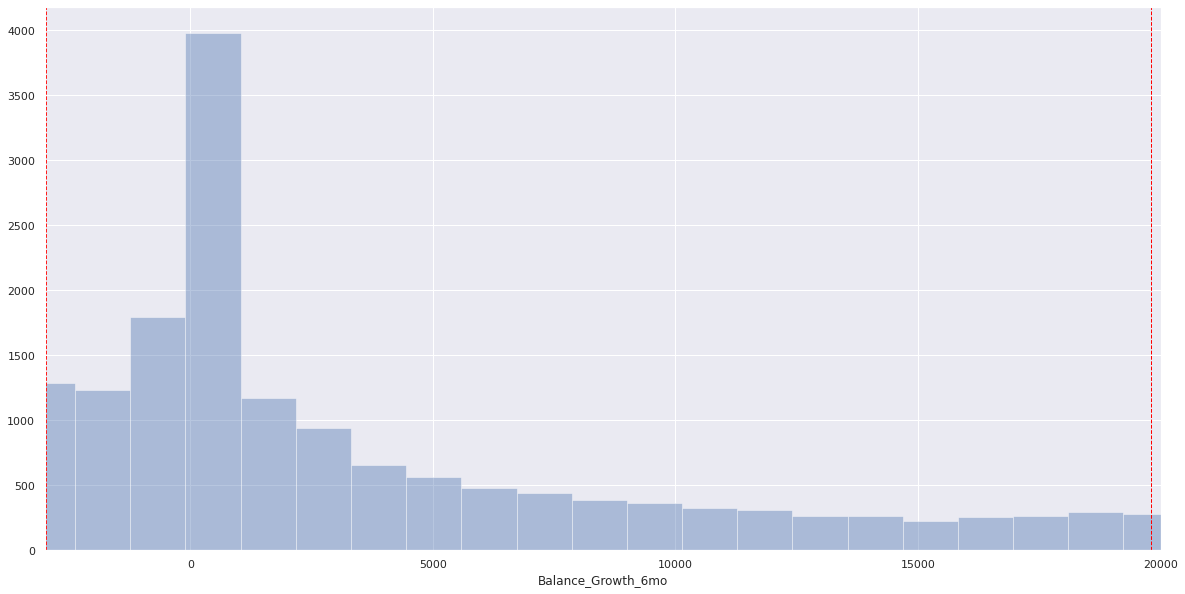

In [ ]:
Bal_Growth_df = raw_data['Balance_Growth_6mo']
sns.distplot(Bal_Growth_df, kde=False, bins=1000 )
plt.axvline(-2963, color='red', linestyle='dashed', linewidth=1)
plt.axvline(19794, color='red', linestyle='dashed', linewidth=1)
plt.xlim(-3000,20000)

In [ ]:
Bal_growth_bins = raw_data[["Balance_Growth_6mo","DEFAULT"]]
Bal_growth_bin = woeBinningPandas.woe_binning(Bal_growth_bins,"DEFAULT","Balance_Growth_6mo", 0.05, 0, 0.1, 50, 'DEFAULT')
Bal_growth_bin

,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, -21881.5]",-66.605833,-inf,-21881.5,0.111387,191,1309,0.028782,0.056026,0.018146
"(-21881.5, -10172.8]",-14.857249,-21881.5,-10172.8,0.111387,295,1205,0.044454,0.051575,0.001058
"(-10172.8, 923.0]",36.347291,-10172.8,923,0.111387,3481,8521,0.524563,0.364706,0.058104
"(923.0, inf]",-27.156334,923.0,inf,0.111387,2669,12329,0.402200,0.527692,0.034079
Missing,NaN,inf,Missing,0.111387,0,0,0.000000,0.000000,NaN


In [ ]:
#**Bal_Growth_6mo - recommended transformation** Create bins as per WOE max  
#Leave out > -10k & <= 1k as cross correlation would render this variable irrelevant.   

raw_data["Balance_Growth_6mo_below_minus21k"] = np.where((raw_data["Balance_Growth_6mo"] <= -21800),1,0)
raw_data["Balance_Growth_6mo_below_minus10k"] = np.where((raw_data["Balance_Growth_6mo"] > -21800) | (raw_data["Balance_Growth_6mo"]<= -10000),1,0)
raw_data["Balance_Growth_6mo_above_1k"] = np.where( raw_data["Balance_Growth_6mo"] >= 1000,1,0)
raw_data[['Balance_Growth_6mo_below_minus21k','Balance_Growth_6mo_below_minus10k','Balance_Growth_6mo_above_1k']].describe()

,Balance_Growth_6mo_below_minus21k,Balance_Growth_6mo_below_minus10k,Balance_Growth_6mo_above_1k
count,30000.000000,30000.0,30000.000000
mean,0.050367,1.0,0.496333
std,0.218704,0.0,0.499995
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,0.000000
75%,0.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [ ]:
# Create new variable: Util_Growth_6mo
#**Util_Growth_6mo - data description**  change in utilization over 6 months
## Create column Util_Growth_6mo ##

raw_data["Util_Growth_6mo"] = raw_data["Util_Bill_1"] - raw_data["Util_Bill_6"]

raw_data["Util_Growth_6mo"].describe()

count    30000.000000
mean         0.105187
std          0.301370
min         -1.827300
25%         -0.029097
50%          0.006860
75%          0.181202
max          5.309500
Name: Util_Growth_6mo, dtype: float64

Text(0.5, 0, 'Util_Growth_6mo')

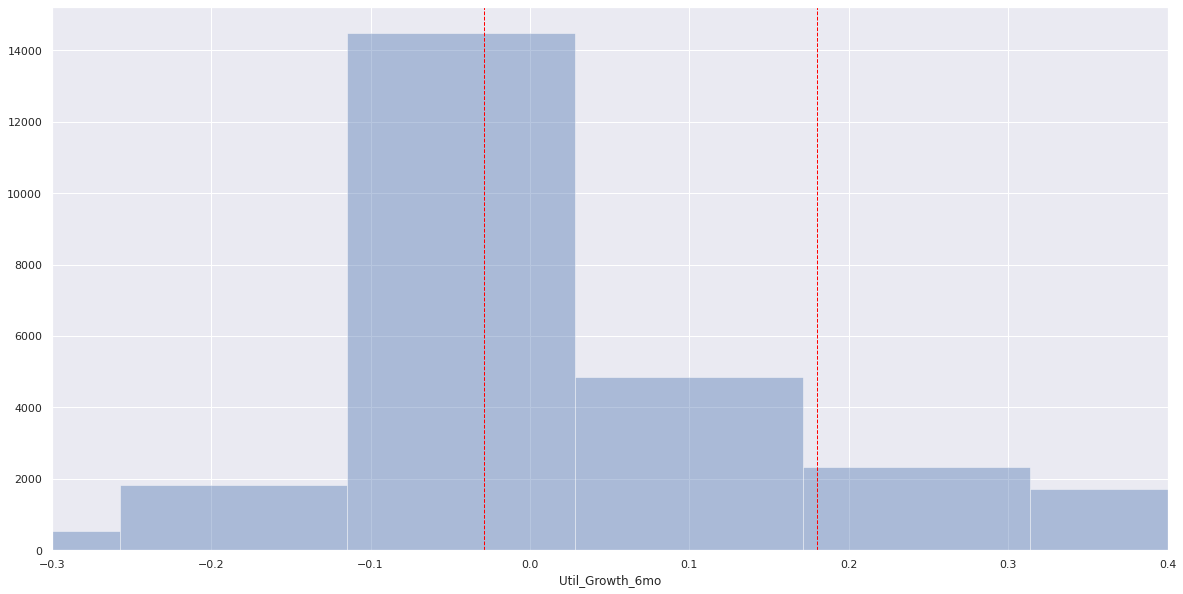

In [ ]:
Util_Growth_df = raw_data['Util_Growth_6mo']
sns.distplot(Util_Growth_df, kde=False,  )
plt.axvline(-.029, color='red', linestyle='dashed', linewidth=1)
plt.axvline(.18, color='red', linestyle='dashed', linewidth=1)
plt.xlim(-.3,.4)
plt.xlabel("Util_Growth_6mo")


In [ ]:
#**Util_Growth_6mo - bin analysis** - investigate binning options for variable split
# check WOE recommended binning and correlation in PAY_X

U_Growth_bins = raw_data[["Util_Growth_6mo","DEFAULT"]]
U_Growth_bin = woeBinningPandas.woe_binning(U_Growth_bins,"DEFAULT","Util_Growth_6mo", 0.05, 0, 0.1, 50, 'DEFAULT')
U_Growth_bin


,woe,cutpoints_final,upper_cutpoints_final_dfrm,iv_total_final,good,bad,col_perc_a,col_perc_b,iv_bins
predictor_var_binned,,,,,,,,,
"(-inf, -0.02909722222]",37.364157,-inf,-0.0290972,0.080558,2191,5309,0.330169,0.227230,0.038462
"(-0.02909722222, -0.003017391304]",-17.022085,-0.029097,-0.00301739,0.080558,580,2421,0.087402,0.103621,0.002761
"(-0.003017391304, 0.0]",34.085504,-0.003017,0,0.080558,778,1948,0.117239,0.083376,0.011542
"(0.0, inf]",-23.048666,0.000000,inf,0.080558,3087,13686,0.465190,0.585773,0.027793
Missing,NaN,inf,Missing,0.080558,0,0,0.000000,0.000000,NaN


In [ ]:
#**Util_Growth_6mo - recommended transformation** Create bins as per WOE max  
#Leave out > .113 & <= 1 as cross correlation would render this variable irrelevant.   
## split Util_Growth_6mo into 4 groups: <= -.03 <= -.003, <= 0, > 0

raw_data["Util_Growth_6mo_below_minus.03"] = np.where(raw_data["Util_Growth_6mo"] <= -.03,1,0)
raw_data["Util_Growth_6mo_below_minus.003"] = np.where((raw_data["Util_Growth_6mo"] > -.03) | (raw_data["Util_Growth_6mo"] <= -.003),1,0)
raw_data["Util_Growth_6mo_above_0"] = np.where(raw_data["Util_Growth_6mo"] > 0,1,0)
raw_data[['Util_Growth_6mo_below_minus.03','Util_Growth_6mo_below_minus.003','Util_Growth_6mo_above_0']].describe()

,Util_Growth_6mo_below_minus.03,Util_Growth_6mo_below_minus.003,Util_Growth_6mo_above_0
count,30000.000000,30000.0,30000.000000
mean,0.247833,1.0,0.559100
std,0.431762,0.0,0.496503
min,0.000000,1.0,0.000000
25%,0.000000,1.0,0.000000
50%,0.000000,1.0,1.000000
75%,0.000000,1.0,1.000000
max,1.000000,1.0,1.000000


In [ ]:
## Tree Moddeling

In [ ]:
%pip install plotnine


In [ ]:
import plotnine as p9

In [ ]:
#**target - transform response variable 'DEFAULT' into factor**

raw_data["target"] = raw_data["DEFAULT"].astype("category")
raw_data

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,u,train,test,validate,data.group,LIMIT_BAL_below_30k,LIMIT_BAL_above_160k,SEX_FEMALE,Married_Y,ED_Grad_other,AGE_below_25,AGE_25to35,AGE_above_40,PAY_X_Sum_6mo,...,Max_Bill_Amt_below_18k,Max_Bill_Amt_below_21k,Max_Bill_Amt_above_52k,PMT_SUM,Avg_Pmt_Amt,Max_Pmt_Amt,Avg_Pmt_Amt_below2k,Avg_Pmt_Amt_above12k,Util_Bill_1,Util_Bill_2,Util_Bill_3,Util_Bill_4,Util_Bill_5,Util_Bill_6,Util_SUM,Avg_Util,Avg_Util_below_.001,Avg_Util_above_.45,Pay_Ratio_1,Pay_Ratio_2,Pay_Ratio_3,Pay_Ratio_4,Pay_Ratio_5,Ratio_SUM,Avg_Pay_Ratio,Balance_Growth_6mo,Avg_Pay_Ratio_below_.035,Avg_Pay_Ratio_above_.113,Avg_Pay_Ratio_above_1,Max_DLQa,Max_DLQ,Max_DLQ_above1,Balance_Growth_6mo_below_minus21k,Balance_Growth_6mo_below_minus10k,Balance_Growth_6mo_above_1k,Util_Growth_6mo,Util_Growth_6mo_below_minus.03,Util_Growth_6mo_below_minus.003,Util_Growth_6mo_above_0,target
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.287578,1,0,0,1,1,0,1,1,0,1,1,0,-2,...,1,1,0,689,114.833333,689,1,0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.385200,0.064200,0,1,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.800000,3913,0,1,0,2,2,1,0,1,1,0.195650,0,1,1,1
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.788305,0,0,1,3,0,0,1,0,0,0,1,0,3,...,1,1,0,5000,833.333333,2000,1,0,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.142308,0.023718,0,1,0.000000,0.372856,0.305623,0.289436,0.000000,0.967915,0.193583,-579,0,1,0,2,2,1,0,1,0,-0.004825,0,1,0,1
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.408977,1,0,0,1,0,0,1,0,0,0,1,0,0,...,1,1,0,11018,1836.333333,5000,1,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,1.129478,0.188246,0,1,0.108220,0.110628,0.069779,0.066899,0.064313,0.419838,0.083968,13690,0,1,0,0,0,0,0,1,1,0.152111,0,1,1,0
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.883017,0,0,1,3,0,0,1,1,0,0,1,0,0,...,1,1,0,8388,1398.000000,2019,1,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,4.626680,0.771113,0,0,0.041465,0.040961,0.042382,0.037985,0.036180,0.198972,0.039794,17443,0,1,0,0,0,0,0,1,1,0.348860,0,1,1,0
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.940467,0,0,1,3,0,0,0,1,0,0,1,1,-2,...,1,1,0,59049,9841.500000,36681,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,2.186780,0.364463,0,1,0.352734,1.023608,0.477555,0.470072,0.036015,2.359984,0.471997,-10514,0,1,0,0,0,0,0,1,0,-0.210280,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0.284993,1,0,0,1,0,1,0,1,0,0,1,0,0,...,1,1,1,42550,7091.666667,20000,0,0,0.858855,0.876432,0.947114,0.400018,0.141986,0.072636,3.297041,0.549507,0,0,0.044084,0.095985,0.056850,0.097545,0.312891,0.607354,0.121471,172968,0,1,0,0,0,0,0,1,1,0.786218,0,1,1,0
29996,29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0.835216,0,0,1,3,0,0,0,0,0,0,1,1,-4,...,1,1,0,14490,2415.000000,8998,0,0,0.011220,0.012187,0.023347,0.059860,0.034600,0.000000,0.141213,0.023536,0,1,1.004923,1.006853,1.002116,0.024855,1.000000,4.038748,0.807750,1683,0,1,0,0,0,0,0,1,1,0.011220,0,1,1,0
29997,29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0.514152,0,1,0,2,1,0,0,0,0,0,1,0,8,...,1,1,0,31300,5216.66

In [ ]:
#**initial data set for 'tree' type models using continuous variables**

sub_list_RF1 = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ","DEFAULT"]

xtrain_RF1  = raw_data.loc[(raw_data["data.group"]==1),sub_list_RF1 ]             


xtest_RF1 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RF1 ] 
validate_RF1 =  raw_data.loc[(raw_data["data.group"]==3),sub_list_RF1 ] 

xtrain_RF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15180 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           15180 non-null  int64  
 1   SEX_FEMALE          15180 non-null  int64  
 2   EDUCATION           15180 non-null  int64  
 3   Married_Y           15180 non-null  int64  
 4   AGE                 15180 non-null  int64  
 5   PAY_X_Sum_6mo       15180 non-null  int64  
 6   Avg_Pmt_Amt         15180 non-null  float64
 7   Avg_Util            15180 non-null  float64
 8   Avg_Pay_Ratio       15180 non-null  float64
 9   Balance_Growth_6mo  15180 non-null  int64  
 10  Util_Growth_6mo     15180 non-null  float64
 11  Max_Bill_Amt        15180 non-null  int64  
 12  Max_Pmt_Amt         15180 non-null  int64  
 13  Max_DLQ             15180 non-null  int64  
 14  DEFAULT             15180 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 1.9 MB


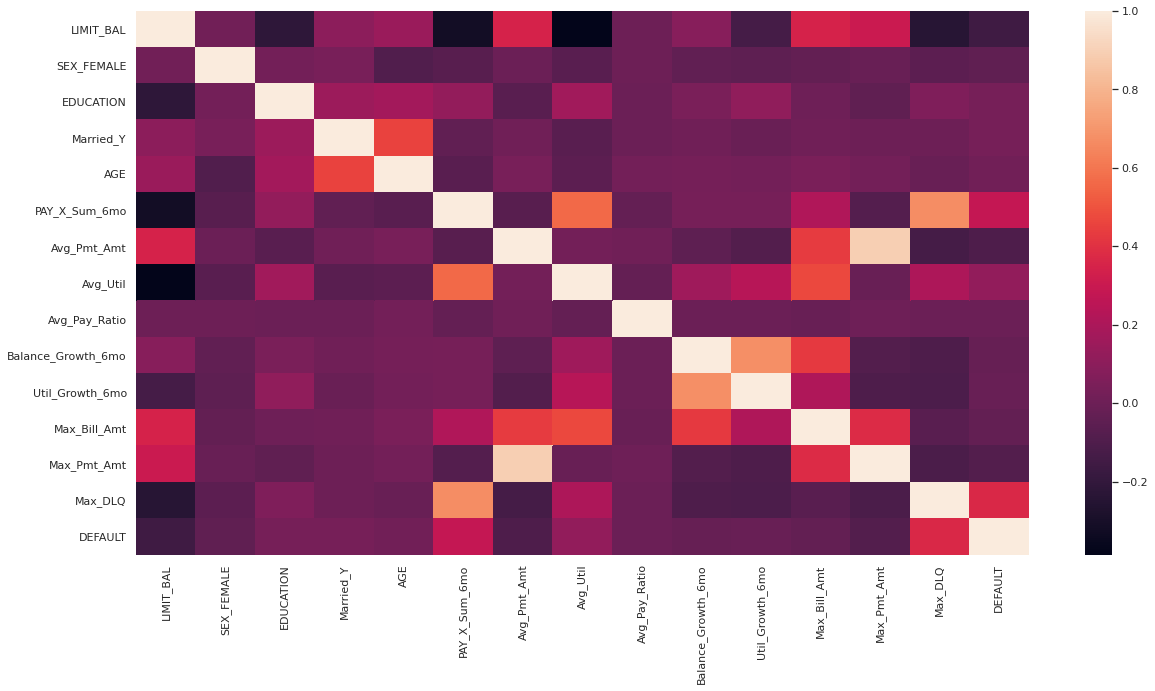

In [ ]:
## Correlation Check & final variable selection:
data_cor =xtrain_RF1.corr()
sns.heatmap(data_cor)



In [ ]:
# check correlation of BILL_X Sum Variable
Train_RF1_correlation = raw_data[sub_list_RF1].corr()

Train_RF1_correlation.iloc[:, [14]]

,DEFAULT
LIMIT_BAL,-0.153520
SEX_FEMALE,-0.039961
EDUCATION,0.028006
Married_Y,0.029775
AGE,0.013890
PAY_X_Sum_6mo,0.281955
Avg_Pmt_Amt,-0.102354
Avg_Util,0.115483
Avg_Pay_Ratio,-0.005772
Balance_Growth_6mo,-0.025649


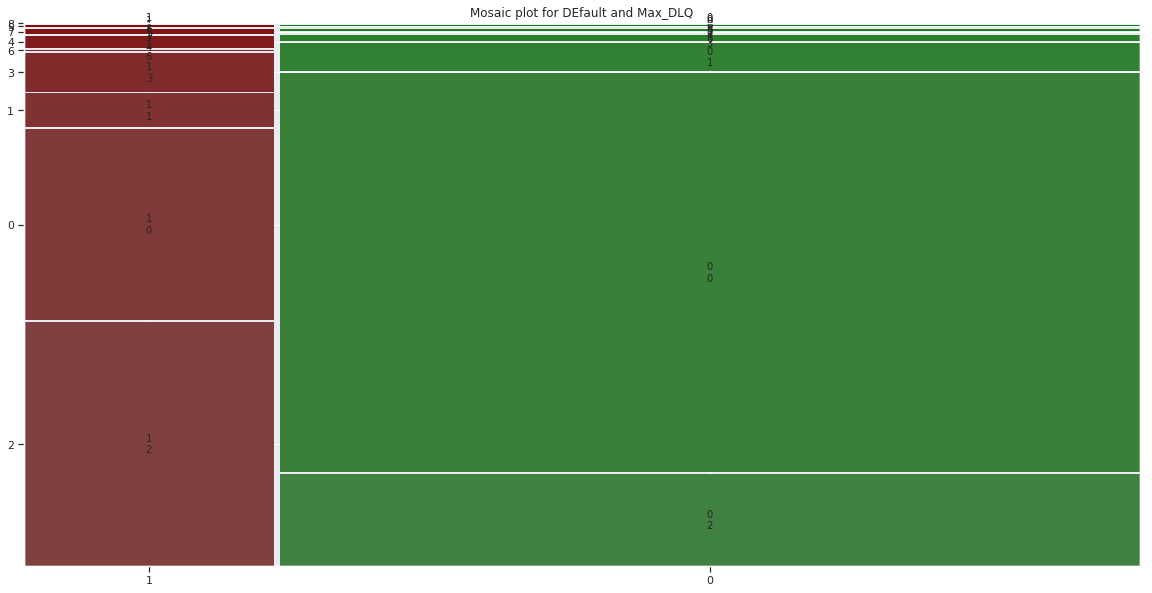

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(xtrain_RF1,  ["DEFAULT" , "Max_DLQ"] ,title='Mosaic plot for DEfault and Max_DLQ' )
plt.show()


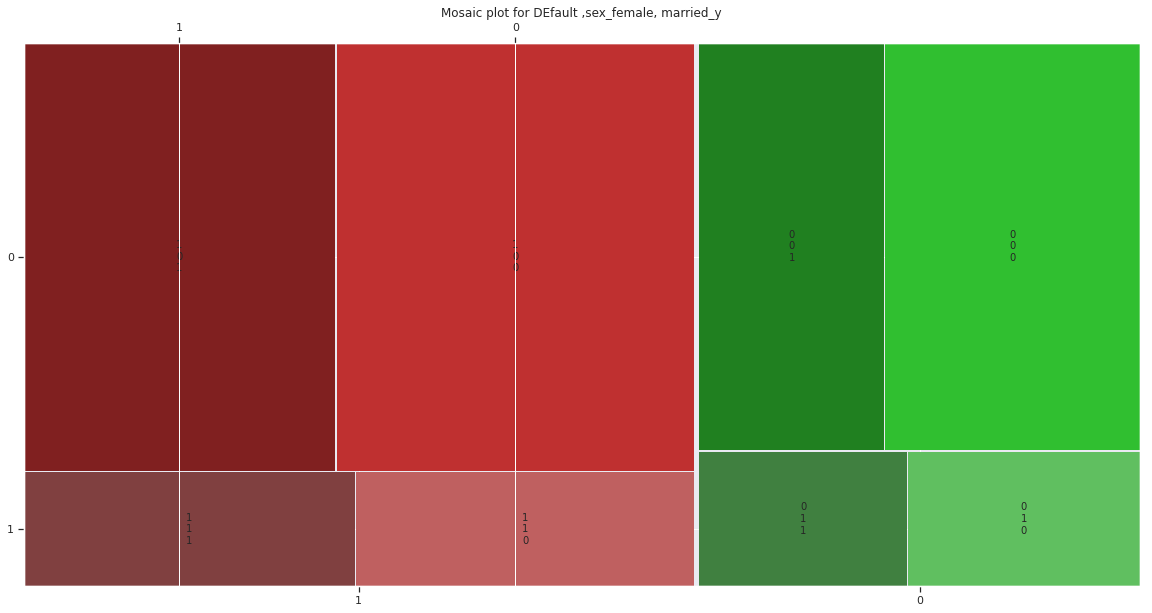

In [ ]:
mosaic(xtrain_RF1,  ["SEX_FEMALE","DEFAULT", "Married_Y"] ,title='Mosaic plot for DEfault ,sex_female, married_y' )
plt.show()

In [ ]:
#**initial data set for 'tree' type models using continuous variables**

sub_list_RFb = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ","target"]

xtrain_RF1  = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ]             


xtest_RF1 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_RF1 =  raw_data.loc[(raw_data["data.group"]==3),sub_list_RFb ] 

xtrain_RF1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15180 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   LIMIT_BAL           15180 non-null  int64   
 1   SEX_FEMALE          15180 non-null  int64   
 2   EDUCATION           15180 non-null  int64   
 3   Married_Y           15180 non-null  int64   
 4   AGE                 15180 non-null  int64   
 5   PAY_X_Sum_6mo       15180 non-null  int64   
 6   Avg_Pmt_Amt         15180 non-null  float64 
 7   Avg_Util            15180 non-null  float64 
 8   Avg_Pay_Ratio       15180 non-null  float64 
 9   Balance_Growth_6mo  15180 non-null  int64   
 10  Util_Growth_6mo     15180 non-null  float64 
 11  Max_Bill_Amt        15180 non-null  int64   
 12  Max_Pmt_Amt         15180 non-null  int64   
 13  Max_DLQ             15180 non-null  int64   
 14  target              15180 non-null  category
dtypes: category(1), float64(4), int64(10

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
cols = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ"]
clf = DecisionTreeClassifier()
clf.fit(xtrain_RF1[cols], xtrain_RF1.target)
clf.feature_importances_

d ={
    "Variables": cols,
    "Overall":list(clf.feature_importances_),
}
importance_t = pd.DataFrame(data=d)
importance_t.sort_values(by=["Overall"], ascending=False)


,Variables,Overall
5,PAY_X_Sum_6mo,0.167605
7,Avg_Util,0.096575
6,Avg_Pmt_Amt,0.093879
4,AGE,0.088540
11,Max_Bill_Amt,0.087451
10,Util_Growth_6mo,0.084915
8,Avg_Pay_Ratio,0.079855
12,Max_Pmt_Amt,0.079643
9,Balance_Growth_6mo,0.078629
0,LIMIT_BAL,0.051381


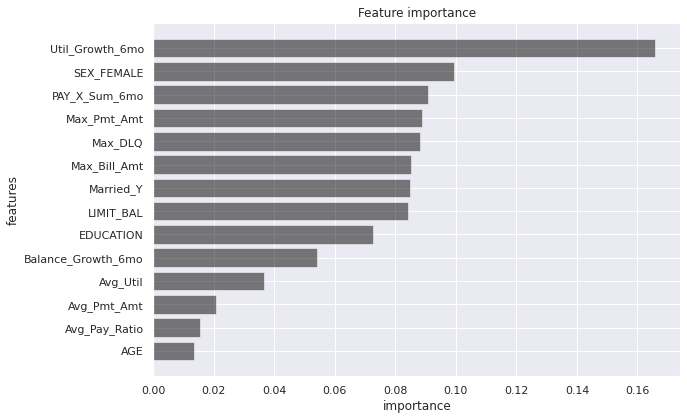

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(cols))
bar_width = 0.35
plt.barh(importance_t["Variables"].sort_values(),importance_t["Overall"].sort_values() , color='black', alpha=0.5)
plt.ylabel('features')
plt.xlabel('importance')
plt.title('Feature importance')
plt.tight_layout()
plt.show()

In [ ]:
sub_list_RFb = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt","Avg_Util","Avg_Pay_Ratio",
               "Balance_Growth_6mo","Util_Growth_6mo","Max_Bill_Amt","Max_Pmt_Amt",
               "Max_DLQ"]
target = raw_data.loc[raw_data["data.group"] == 1, "target" ]
# target

xtrain_RF1  = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ]             


xtest_RF1 = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_RF1 =  raw_data.loc[(raw_data["data.group"]==3),sub_list_RFb ] 

# xtrain_RF1.info()

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data

rf.fit(xtrain_RF1, target);

In [ ]:
# Use the forest's predict method on the test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

predRF1 = rf.predict(xtrain_RF1)
predRF1_prob = rf.predict_proba(xtrain_RF1)



In [ ]:
cm = confusion_matrix(target, predRF1)
cm




array([[11757,     0],
       [    5,  3418]])

RF1train accuracy score using ROC AUC=1.000


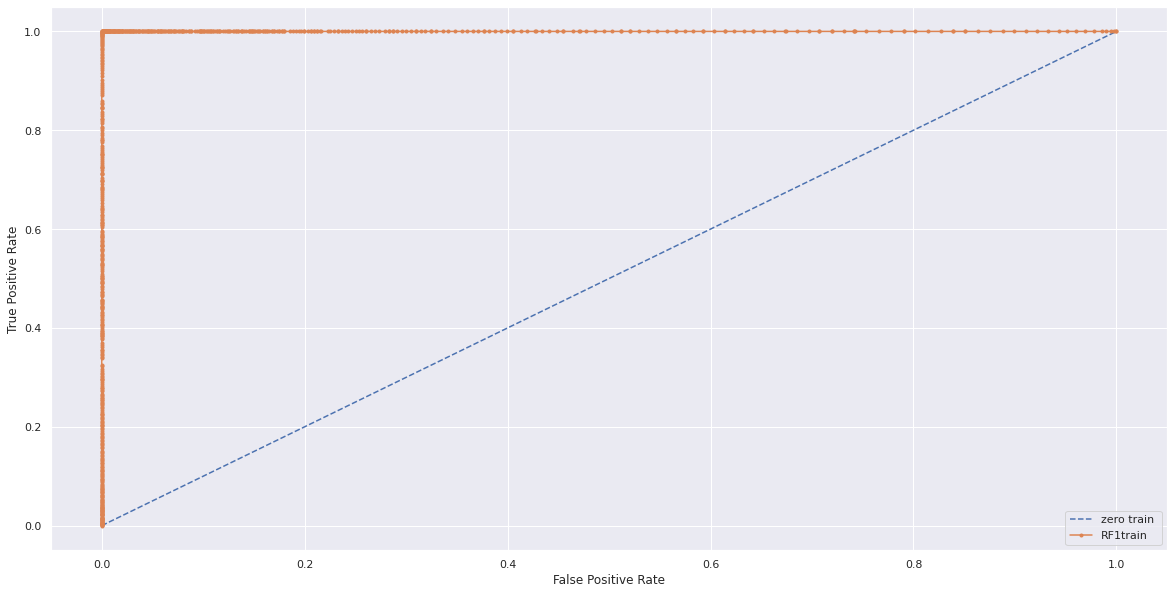

In [ ]:

# Use the forest's predict method on the test data
predRF1_prob = rf.predict_proba(xtrain_RF1)

predRF1_prob = predRF1_prob[:, 1]
predRF1_prob

# calculate scores
ns_probs = [0 for _ in range(len(target))]

ns_auc = roc_auc_score(target, ns_probs)
pred_auc = roc_auc_score(target, predRF1_prob)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('RF1train accuracy score using ROC AUC=%.3f' % (pred_auc))



ns_fpr, ns_tpr, _ = roc_curve(target, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target, predRF1_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero train ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='RF1train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()



RF1test accuracy score using ROC AUC=0.757


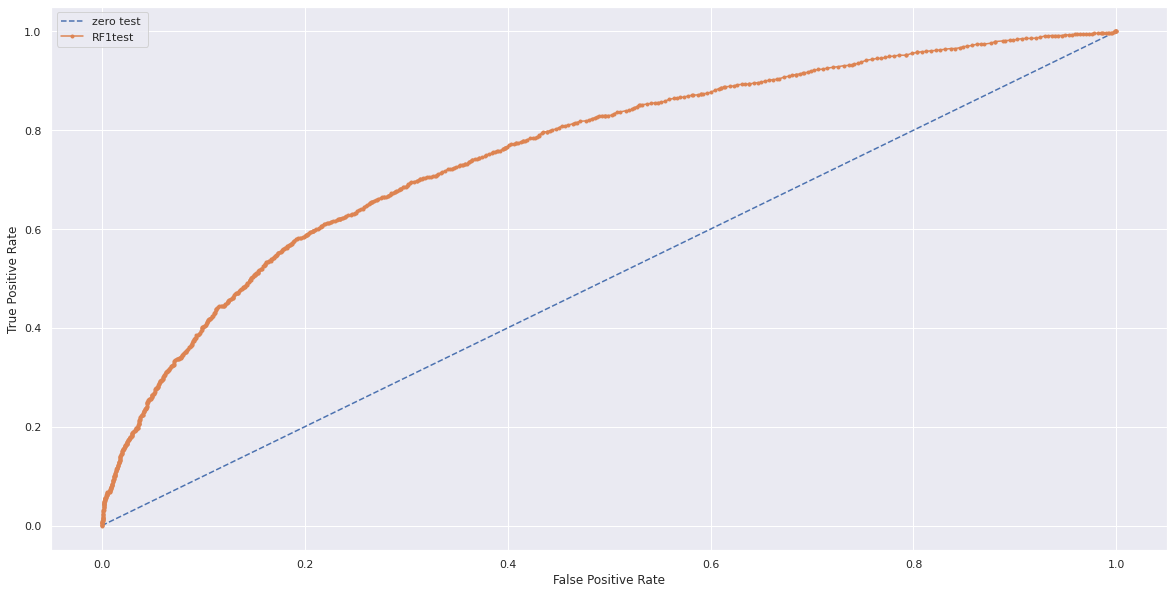

In [ ]:
### Predicting on test set  ##
target_test = raw_data.loc[raw_data["data.group"] == 2, "target" ]

# Use the forest's predict method on the test data
predRF1_test = rf.predict_proba(xtest_RF1)

predRF1_test = predRF1_test[:, 1]
predRF1_test

# calculate scores
ns_probs = [0 for _ in range(len(target_test))]

ns_auc = roc_auc_score(target_test, ns_probs)
pred_auc = roc_auc_score(target_test, predRF1_test)
 
 # summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('RF1test accuracy score using ROC AUC=%.3f' % (pred_auc))



ns_fpr, ns_tpr, _ = roc_curve(target_test, ns_probs)
pred_fpr, pred_tpr, _ = roc_curve(target_test, predRF1_test)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='zero test ')
plt.plot(pred_fpr, pred_tpr, marker='.', label='RF1test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [ ]:
## Gradient Boosting method

#**set up train/test/validate data**
sub_list_GBM = ["LIMIT_BAL","SEX_FEMALE","EDUCATION",
               "Married_Y","AGE","PAY_X_Sum_6mo","Avg_Pmt_Amt",
               "Balance_Growth_6mo","Max_Bill_Amt","Max_DLQ","target"]

target_tain_GBM = raw_data.loc[(raw_data["data.group"]==1),"target" ] 
xtrain_GBM = raw_data.loc[(raw_data["data.group"]==1),sub_list_RFb ] 
xtest_GBM = raw_data.loc[(raw_data["data.group"]==2),sub_list_RFb ] 
validate_GBM = raw_data.loc[(raw_data["data.group"]==33),sub_list_RFb ] 
str(xtrain_GBM)


NameError: ignored